In [139]:
import pandas
import seaborn
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

chipotle_data = pandas.read_csv(url, sep = '\t')
chipotle_data.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [140]:
chipotle_data.info()
chipotle_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [141]:
chipotle_data.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [142]:
item_orders = chipotle_data.groupby("item_name")["quantity"].sum()
most_ordered_item = item_orders.idxmax()
highest_quantity = item_orders.max()
print(most_ordered_item)
print(highest_quantity)


Chicken Bowl
761


In [143]:
process_prices= chipotle_data["item_price"].str.replace("$","").astype(float)
total_revenues= process_prices.sum()
print(total_revenues)

34500.16


In [144]:
## Total number of orders
print(chipotle_data['order_id'].max())
print(chipotle_data['order_id'].nunique())

1834
1834


In [145]:
items_above_ten = process_prices > 10
items_above_ten.sum()

np.int64(1130)

In [146]:
unique_item_names=chipotle_data["item_name"].unique()
for i in unique_item_names:
    print(i)

Chips and Fresh Tomato Salsa
Izze
Nantucket Nectar
Chips and Tomatillo-Green Chili Salsa
Chicken Bowl
Side of Chips
Steak Burrito
Steak Soft Tacos
Chips and Guacamole
Chicken Crispy Tacos
Chicken Soft Tacos
Chicken Burrito
Canned Soda
Barbacoa Burrito
Carnitas Burrito
Carnitas Bowl
Bottled Water
Chips and Tomatillo Green Chili Salsa
Barbacoa Bowl
Chips
Chicken Salad Bowl
Steak Bowl
Barbacoa Soft Tacos
Veggie Burrito
Veggie Bowl
Steak Crispy Tacos
Chips and Tomatillo Red Chili Salsa
Barbacoa Crispy Tacos
Veggie Salad Bowl
Chips and Roasted Chili-Corn Salsa
Chips and Roasted Chili Corn Salsa
Carnitas Soft Tacos
Chicken Salad
Canned Soft Drink
Steak Salad Bowl
6 Pack Soft Drink
Chips and Tomatillo-Red Chili Salsa
Bowl
Burrito
Crispy Tacos
Carnitas Crispy Tacos
Steak Salad
Chips and Mild Fresh Tomato Salsa
Veggie Soft Tacos
Carnitas Salad Bowl
Barbacoa Salad Bowl
Salad
Veggie Crispy Tacos
Veggie Salad
Carnitas Salad


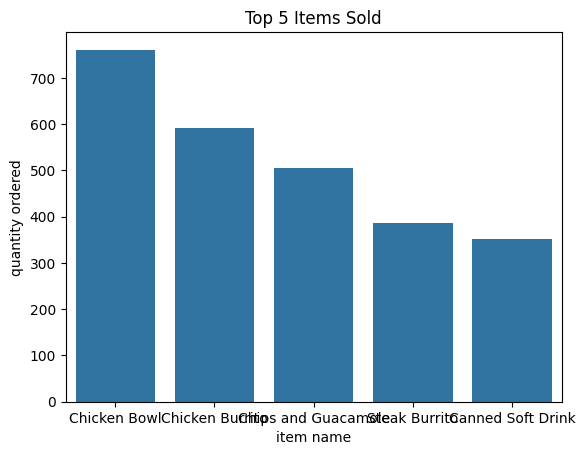

In [147]:
#top_items = item_orders.sort_values(ascending=False).iloc[:5]
# item_orders = chipotle_data.groupby("item_name")["quantity"].sum()
top_5_items = item_orders.nlargest(5)
seaborn.barplot(x=top_5_items.index,y=top_5_items.values)
plt.xlabel("item name")
plt.ylabel("quantity ordered")
plt.title("Top 5 Items Sold")
plt.show()


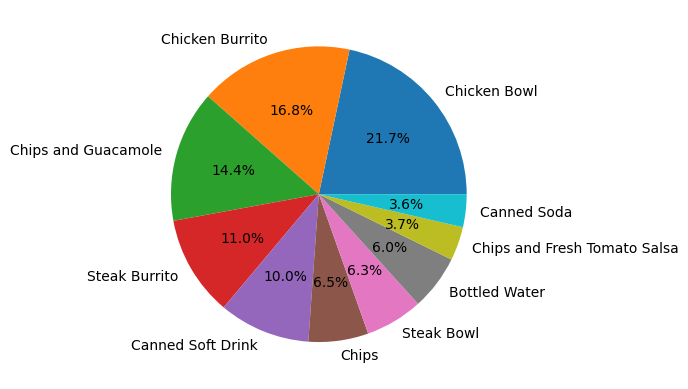

In [148]:
# Create a pie chart showing
# the number of times each of the top 10 items were ordered.
# item_orders = chipotle_data.groupby("item_name")["quantity"].sum()

top_10_items = item_orders.nlargest(10)

plt.pie(top_10_items, labels = top_10_items.index, autopct="%1.1f%%")
plt.show()

C:\Users\kenny\AppData\Local\Temp\ipykernel_3088\2678990725.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chipotle_data_filtered_top_10["total_price"] = chipotle_data_filtered_top_10["quantity"] * chipotle_data_filtered_top_10["item_price"]


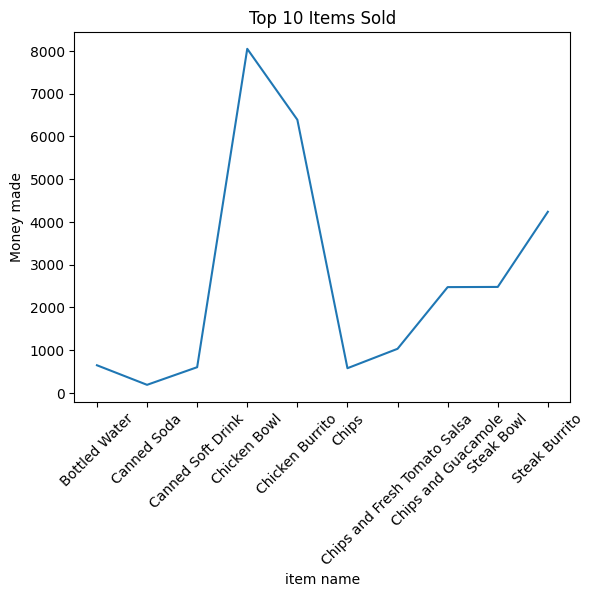

In [149]:
# 10.Create a line graph showing
# how much money was spent on the top 10 items ordered.
chipotle_data["item_price"] = chipotle_data["item_price"].str.replace("$","").astype(float)


## top_10_items = chipotle_data.groupby("item_name")["quantity"].sum()
chipotle_data_filtered_top_10 = chipotle_data[chipotle_data["item_name"].isin(top_10_items.index)]

## revenue = quantity * price

chipotle_data_filtered_top_10["total_price"] = chipotle_data_filtered_top_10["quantity"] * chipotle_data_filtered_top_10["item_price"]

##TODO: Calculate how much in total was spent

total_spent = chipotle_data_filtered_top_10.groupby("item_name")["total_price"].sum()

## modify item_proce column in order
## to remove dollar signs and make it float data type
seaborn.lineplot(total_spent)
plt.xlabel("item name")
plt.ylabel("Money made")
plt.title("Top 10 Items Sold")
plt.xticks(rotation=45)
plt.show()